## 1) Objective
##### Segment the audience of gamers to predict the impact of evolutions in gameplays and business models on the performance of future games.

###### Importing necessary libraries and tools

In [1]:
import numpy as np
import pandas as pd 

## 2) Generating fictional data (as realistic as possible) about users purshases

In [2]:

# Setting random seed for reproducibility
#np.random.seed(42)

# Number of users
num_users = 10000

# Simulate Sales and User Data
games = [
    "Assassin's Creed Black Flag", 
    "Assassin's Creed Unity", 
    "Assassin's Creed Syndicate", 
    "Assassin's Creed Origins", 
    "Assassin's Creed Odissey", 
    "Assassin's Creed Valhalla", 
    "Assassin's Creed Mirage", 
    "Watch Dogs",
    "Watch Dogs 2", 
    "Rainbow Six Siege", 
    "Far Cry 5", 
    "Far Cry 6",
    "Anno 2070",
    "Anno 1800",
    "The Crew",
    ]
platforms = ["PC", "PS5", "PS4", "Xbox", "Switch"]

user_ids = range(1, num_users + 1)
game_titles = np.random.choice(games, num_users)
purchase_dates = pd.date_range(start="2021-01-01", end="2023-10-31", freq="D").to_numpy()
selected_dates = np.random.choice(purchase_dates, num_users)
platforms_selected = np.random.choice(platforms, num_users)
prices = np.random.uniform(20, 60, num_users)  # Price range from 20 to 60
in_game_purchases = np.random.randint(0, 5, num_users)  # Number of in-game purchases

# Simulate Gamer Behavior Data
hours_played = np.random.randint(1, 100, num_users)
game_progression = np.random.randint(1, 101, num_users) 
achievements_unlocked = np.random.randint(0, 51, num_users)
multiplayer_usage = np.random.randint(0, 2, num_users)  # 1 for multiplayer, 0 for single-player

# Simulate Gamer Motivations, Expectations, and Satisfaction Surveys
reason_for_playing = np.random.randint(1, 6, num_users)
expectation_score = np.random.randint(1, 11, num_users)
satisfaction_score = np.random.randint(1, 11, num_users)

# Create DataFrame
df = pd.DataFrame({
    "UserID": user_ids,
    "GameTitle": game_titles,
    "PurchaseDate": selected_dates,
    "Platform": platforms_selected,
    "Price": prices,
    "InGamePurchases": in_game_purchases,
    "HoursPlayed": hours_played,
    "GameProgression": game_progression,
    "AchievementsUnlocked": achievements_unlocked,
    "MultiplayerUsage": multiplayer_usage,
    "ReasonForPlaying": reason_for_playing,
    "ExpectationScore": expectation_score,
    "SatisfactionScore": satisfaction_score
})

df.head() 

,UserID,GameTitle,PurchaseDate,Platform,Price,InGamePurchases,HoursPlayed,GameProgression,AchievementsUnlocked,MultiplayerUsage,ReasonForPlaying,ExpectationScore,SatisfactionScore
0,1,The Crew,2021-06-03,PS4,40.775141,1,27,6,46,0,2,2,4
1,2,Watch Dogs,2021-03-06,PS4,56.528910,3,38,96,18,1,2,10,6
2,3,Anno 1800,2021-07-18,PS4,24.185061,0,4,41,37,0,5,7,3
3,4,Watch Dogs,2023-10-21,PS5,35.710956,1,3,17,41,0,3,5,9
4,5,Rainbow Six Siege,2021-10-01,PS5,30.850543,2,31,62,5,1,4,10,7


## 3) Display some general statistics about our data (ADE)

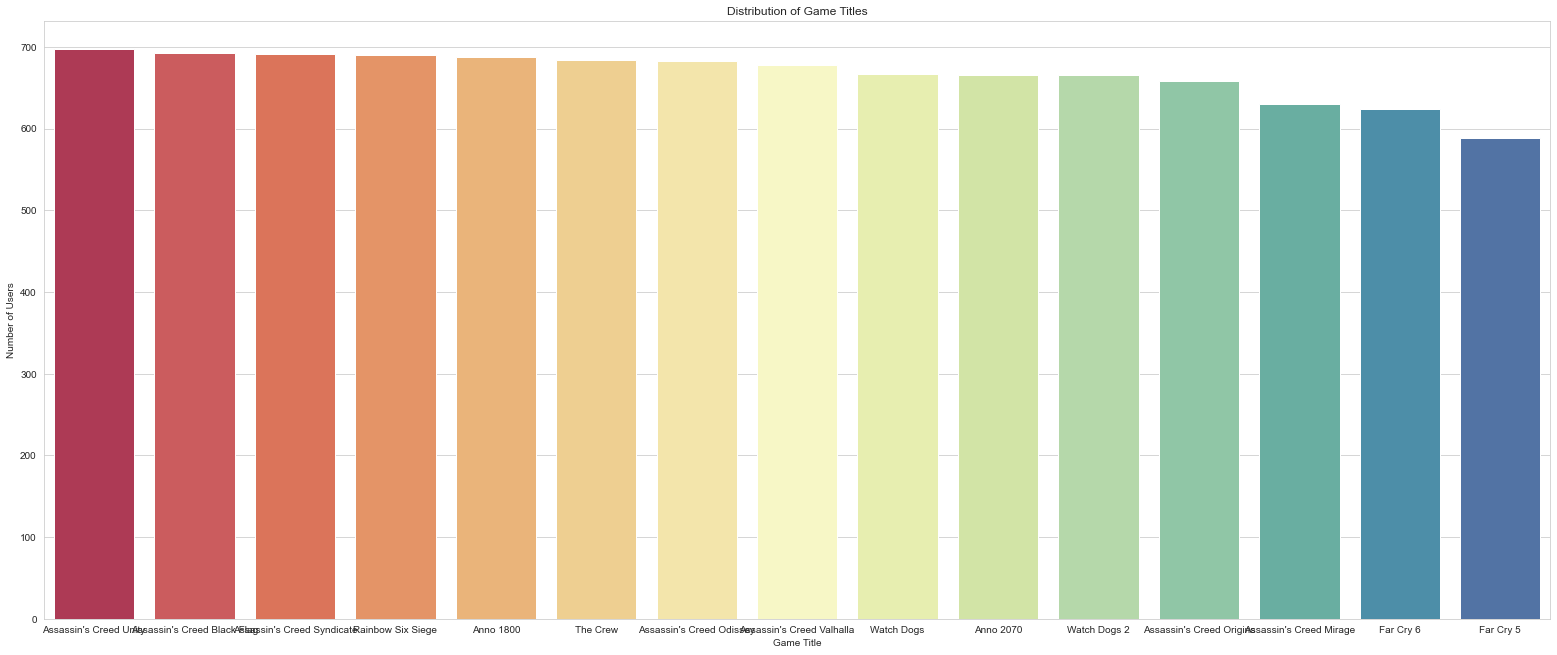

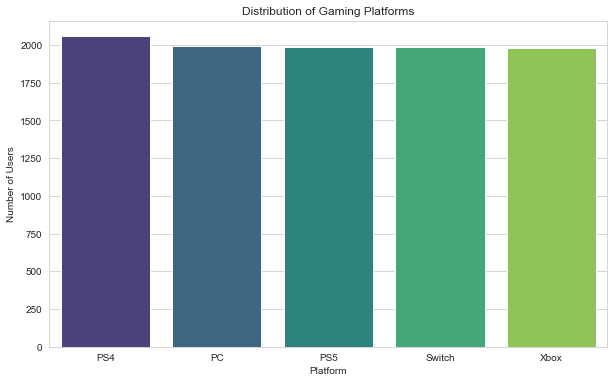

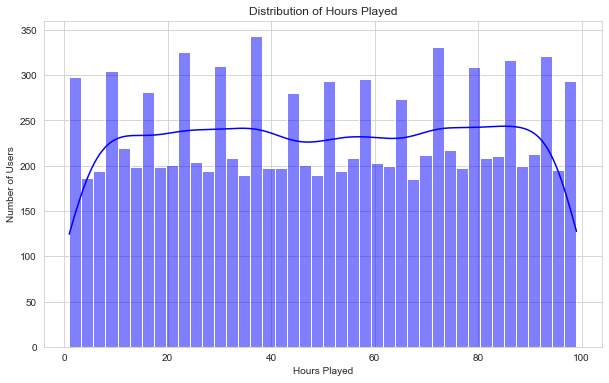

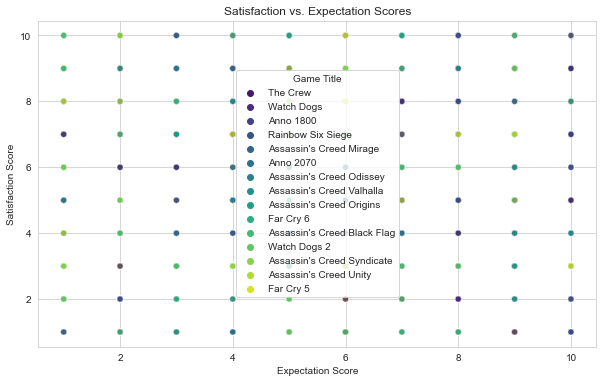

In [3]:
df.describe() 
import string 

import matplotlib.pyplot as plt
import seaborn as sns

# Set style for the plots
sns.set_style("whitegrid")

# Distribution of Game Titles
plt.figure(figsize=(27, 11))
sns.countplot(data=df, x="GameTitle", order=df["GameTitle"].value_counts().index, palette="Spectral")
plt.title("Distribution of Game Titles")
plt.ylabel("Number of Users")
plt.xlabel("Game Title")
plt.show()

# Distribution of Platforms
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Platform", order=df["Platform"].value_counts().index, palette="viridis")
plt.title("Distribution of Gaming Platforms")
plt.ylabel("Number of Users")
plt.xlabel("Platform")
plt.show()

# Distribution of Hours Played
plt.figure(figsize=(10, 6))
sns.histplot(df["HoursPlayed"], bins=42, color="Blue", kde=True)
plt.title("Distribution of Hours Played")
plt.ylabel("Number of Users")
plt.xlabel("Hours Played")
plt.show()

# Scatter plot of Satisfaction vs. Expectation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="ExpectationScore", y="SatisfactionScore", hue="GameTitle", palette="viridis", alpha=0.7)
plt.title("Satisfaction vs. Expectation Scores")
plt.ylabel("Satisfaction Score")
plt.xlabel("Expectation Score")
plt.legend(title="Game Title")
plt.show()




## 4) Customer Segmentation using K-Means Clustering
#### Here we will do some clustering into the users dataset

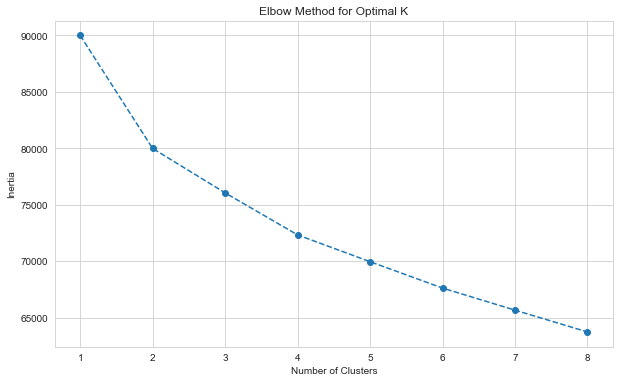

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Selecting relevant features for clustering
cluster_data = df[["Price", "InGamePurchases", "HoursPlayed", "GameProgression", "AchievementsUnlocked",
                   "MultiplayerUsage", "ReasonForPlaying", "ExpectationScore", "SatisfactionScore"]]

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Checking if there are any missing values
try:
    missing_values = cluster_data.isnull().sum().sum()

except BaseException as missing_values:
    "There is missing values into the clustering process"
    

# Finding the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 9), inertia, marker="o", linestyle="--")
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()




#### K starts to decrease as a slower rate from around 7, Let's apply K-Means algorithm to 7 clusters !

In [5]:
from sklearn.cluster import KMeans

# Assuming K = 3; replace with your chosen value if different
K = 7

kmeans_model = KMeans(n_clusters=K, random_state=42)

# Fit Model to Scaled Data
kmeans_model.fit(scaled_data)

# Assign cluster number to users
cluster_assignments = kmeans_model.labels_
df["Cluster"] = cluster_assignments
print(df["Cluster"])



0       6
1       2
2       6
3       6
4       4
       ..
9995    3
9996    2
9997    6
9998    1
9999    3
Name: Cluster, Length: 10000, dtype: int32


## 5) Clusters Analysis
#### Here we will simply view some distributions and density inside clusters 

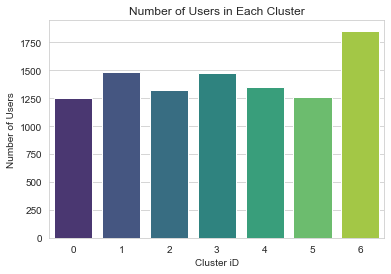

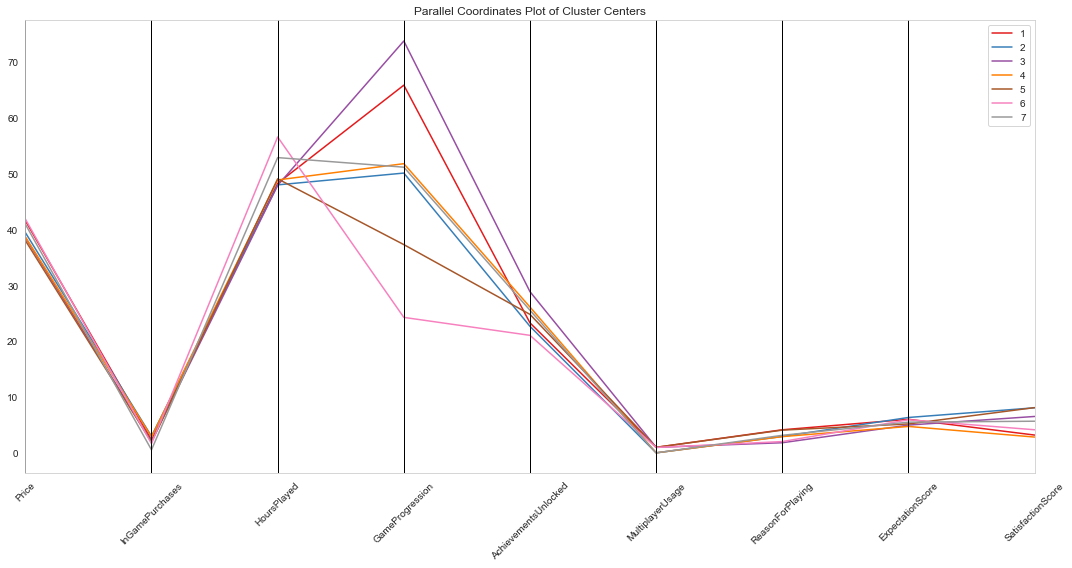

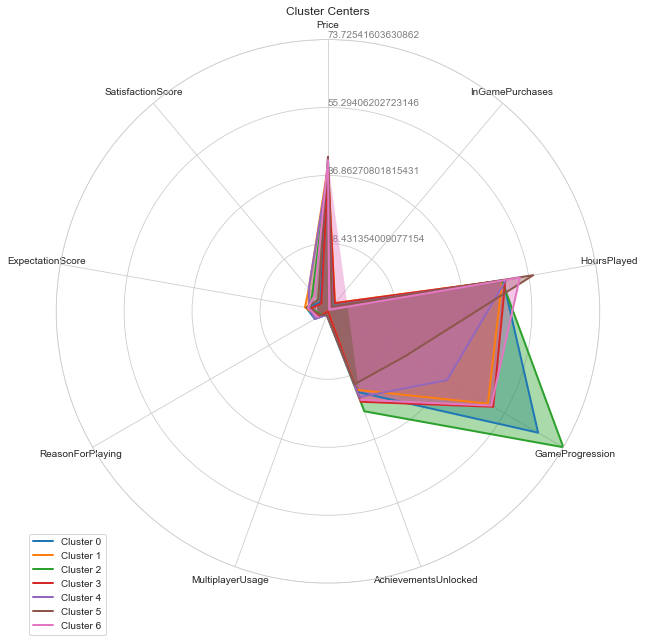

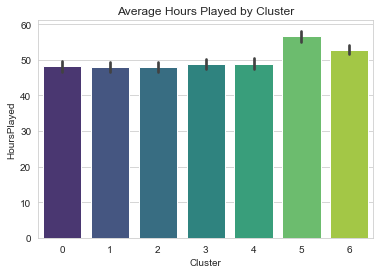

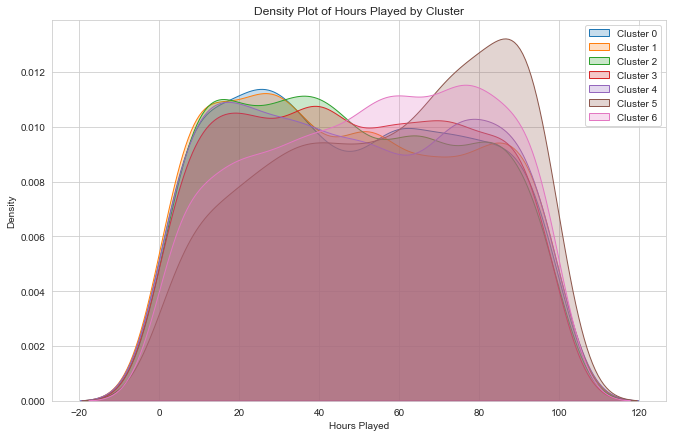

As Clusters 0 and 3 seems to contains and represents sorts of outliers, we can consider looking for a data preparetion step to clean outliers values according to functionals rules about hours spent on a game.


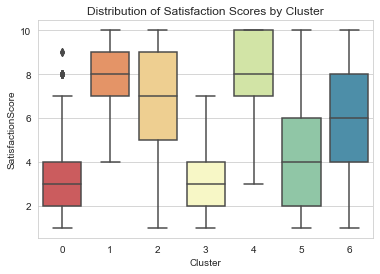

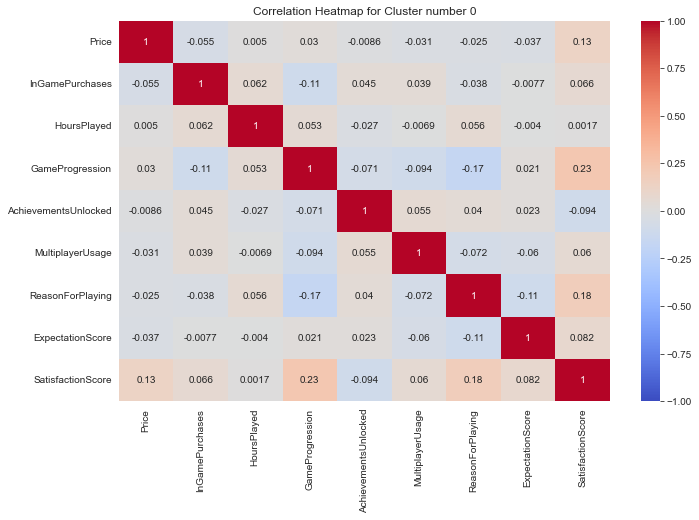

Here we can see that almost all data are correlated, it is due to the random data generation without bias, with real data this analysis gives insights


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

# Cluster Size 
cluster_size = df["Cluster"].value_counts().sort_index() 

sns.barplot(x=cluster_size.index, y=cluster_size.values, palette="viridis")
plt.title("Number of Users in Each Cluster")
plt.xlabel("Cluster iD")
plt.ylabel("Number of Users")
plt.show()


# Extracting cluster centers computed by KMEANS algo
cluster_centers = kmeans_model.cluster_centers_
cluster_centers_df = pd.DataFrame(scaler.inverse_transform(cluster_centers), columns=cluster_data.columns)


# Adding a 'Cluster' column to the cluster centers dataframe
cluster_centers_df['Cluster'] = range(1, len(cluster_centers_df) + 1)

# Plotting the parallel coordinates plot
plt.figure(figsize=(15, 8))
parallel_coordinates(cluster_centers_df, 'Cluster', colormap=plt.get_cmap("Set1"))
plt.title('Parallel Coordinates Plot of Cluster Centers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

def plot_radar_chart(df, title):
    """
    Plot a radar chart for each row in df.
    """
    # Number of variables
    categories = list(df)
    N = len(categories)
    
    # Set the angle of each axis in the plot
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]
    
    # Radar plot initialization
    plt.figure(figsize=(10, 10))
    ax = plt.subplot(111, polar=True)
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], categories)
    
    # Draw ylabels
    ax.set_rlabel_position(0)
    max_val = df.values.max()
    plt.yticks(np.linspace(0, max_val, 5), list(map(str, np.linspace(0, max_val, 5))), color="grey", size=10)
    plt.ylim(0, max_val)
    
    # Plot data
    for index, row in df.iterrows():
        values = row.values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=f"Cluster {index}")
        ax.fill(angles, values, alpha=0.4)
    
    # Add legend
    plt.title(title)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.show()

# Visualizing cluster centers using the radar plot
plot_radar_chart(cluster_centers_df.drop("Cluster", axis=1), "Cluster Centers")


# Average hours played by players on every cluster
sns.barplot(x="Cluster", y="HoursPlayed", data=df, palette="viridis")
plt.title("Average Hours Played by Cluster")
plt.show()

# Deeper analysis with density plot :
plt.figure(figsize=(11, 7))
for cluster in sorted(df["Cluster"].unique()):
    subset = df[df["Cluster"] == cluster]
    sns.kdeplot(subset["HoursPlayed"], label=f"Cluster {cluster}", shade=True)

plt.title("Density Plot of Hours Played by Cluster")
plt.xlabel("Hours Played")
plt.ylabel("Density")
plt.legend()
plt.show()

print("As Clusters 0 and 3 seems to contains and represents sorts of outliers, we can consider looking for a data preparetion step to clean outliers values according to functionals rules about hours spent on a game.")

# Distribution of satisfaction score given by players on every cluster under boxplot
sns.boxplot(x="Cluster", y="SatisfactionScore", data=df, palette="Spectral")
plt.title("Distribution of Satisfaction Scores by Cluster")
plt.show()

# Analyse correlations between features into one specific cluster
cluster_number_to_analyse_eg = 0 
cluster0_data = df[df["Cluster"] == cluster_number_to_analyse_eg].drop(columns=["UserID", "Cluster"])  # Dropping non-numeric columns
correlation_matrix = cluster0_data.corr()

plt.figure(figsize=(11, 7))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title(f"Correlation Heatmap for Cluster number {cluster_number_to_analyse_eg}")
plt.show()
print("Here we can see that almost all data are correlated, it is due to the random data generation without bias, with real data this analysis gives insights")




## Here we can see that almost all data are correlated between them, it is due to the random data generation without bias, with real data this heatmap analysis gives insights about differents features, if a feature is very correlated wfith another one, it means that we can probably keep one of them.

#### Time pushases analysis by cluster (Monthly):

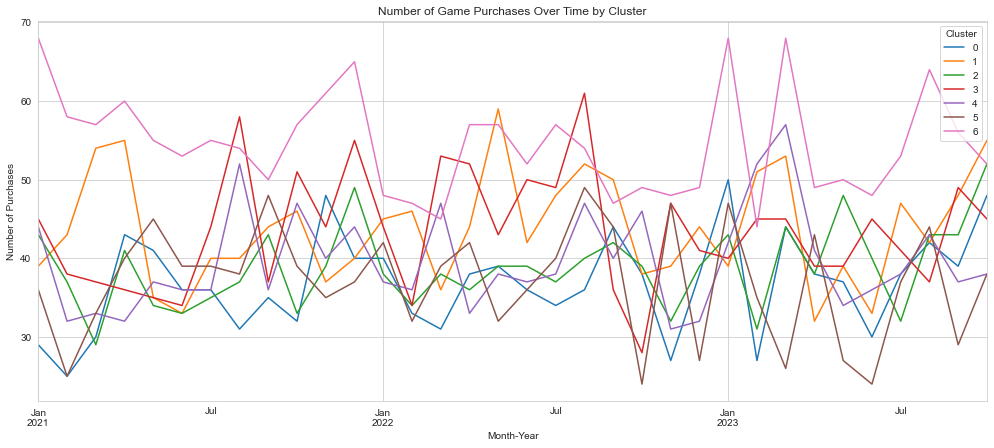

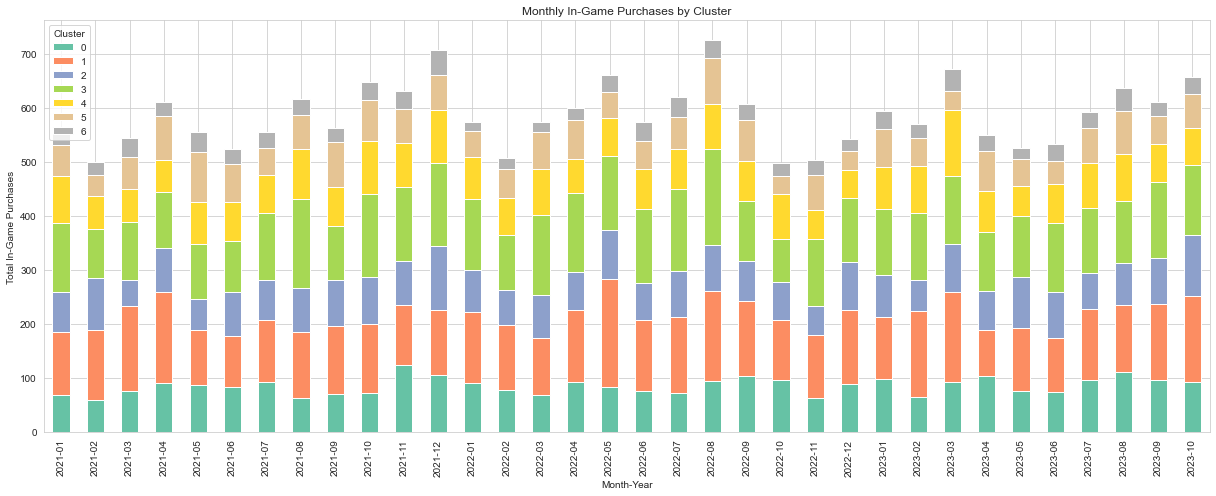

In [7]:
# Extracting month-year from purchase date
df["PurchaseMonth"] = df["PurchaseDate"].dt.to_period("M")  
purchases_over_time = df.groupby(["PurchaseMonth", "Cluster"]).size().unstack()

plt.figure(figsize=(17, 7))
purchases_over_time.plot(ax=plt.gca())
plt.title("Number of Game Purchases Over Time by Cluster")
plt.xlabel("Month-Year")
plt.ylabel("Number of Purchases")
plt.legend(title="Cluster")
plt.show()


# Grouping by purchase month and cluster, then summing in-game purchases
monthly_purchases = df.groupby(["PurchaseMonth", "Cluster"])["InGamePurchases"].sum().unstack()

# Plotting the analysis results of monthly in-game purchase using a stacked bar chart
plt.figure(figsize=(17, 7))
monthly_purchases.plot(kind="bar", stacked=True, ax=plt.gca(), colormap="Set2")
plt.title("Monthly In-Game Purchases by Cluster")
plt.xlabel("Month-Year")
plt.ylabel("Total In-Game Purchases")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


## Generate New fictional data in order to do analyse external Industry Trends in the market and its alignment with our clusters

In [8]:
# Simulating additional user data

# User Demographics
ages = np.random.choice(range(15, 60), num_users)  # Age range from 15 to 60
genders = np.random.choice(["Male", "Female", "Non-binary", "Other"], num_users)
regions = np.random.choice(["North America", "Europe", "Asia", "South America", "Africa", "Oceania"], num_users)

# Game Preferences
genres = ["Action", "Adventure", "Strategy", "Sports", "RPG", "Simulation"]
preferred_genre = np.random.choice(genres, num_users)
graphics_importance = np.random.randint(1, 11, num_users)  # Scale of 1 to 10
storyline_importance = np.random.randint(1, 11, num_users)  # Scale of 1 to 10

# Industry Trends (binary response: 1 if interested, 0 otherwise)
game_duration = np.random.randint(0, 2, num_users)
cross_platform_interest = np.random.randint(0, 2, num_users)
subscription_interest = np.random.randint(0, 2, num_users)
esports_and_competition_interest = np.random.randint(0, 2, num_users)

# Adding simulated data to the original dataframe by aggregating columns
df["Age"] = ages
df["Gender"] = genders
df["Region"] = regions
df["PreferredGenre"] = preferred_genre
df["GraphicsImportance"] = graphics_importance
df["StorylineImportance"] = storyline_importance
df["GameDuration"] = game_duration
df["CrossPlatformInterest"] = cross_platform_interest
df["SubscriptionInterest"] = subscription_interest
df["eSportInterest"] = esports_and_competition_interest

# Viewing the extended dataframe
df.head()


,UserID,GameTitle,PurchaseDate,Platform,Price,InGamePurchases,HoursPlayed,GameProgression,AchievementsUnlocked,MultiplayerUsage,...,Age,Gender,Region,PreferredGenre,GraphicsImportance,StorylineImportance,GameDuration,CrossPlatformInterest,SubscriptionInterest,eSportInterest
0,1,The Crew,2021-06-03,PS4,40.775141,1,27,6,46,0,...,57,Other,South America,Strategy,1,3,0,1,0,0
1,2,Watch Dogs,2021-03-06,PS4,56.528910,3,38,96,18,1,...,35,Other,Asia,Action,9,10,1,1,0,0
2,3,Anno 1800,2021-07-18,PS4,24.185061,0,4,41,37,0,...,37,Female,South America,Sports,2,7,1,0,0,1
3,4,Watch Dogs,2023-10-21,PS5,35.710956,1,3,17,41,0,...,22,Female,Asia,Strategy,1,8,0,0,0,0
4,5,Rainbow Six Siege,2021-10-01,PS5,30.850543,2,31,62,5,1,...,35,Female,South America,Action,10,7,1,1,0,1


#### Vizualise distributions and basic stats arround industry trends that we've just added

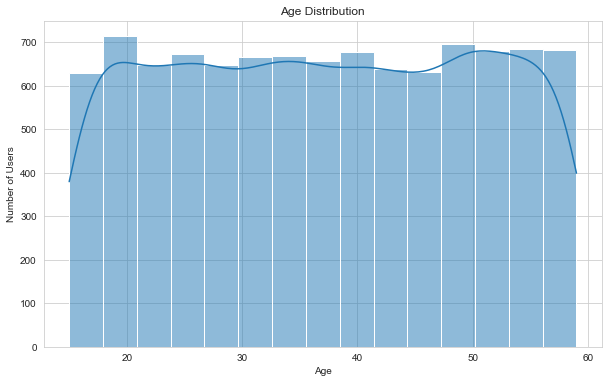

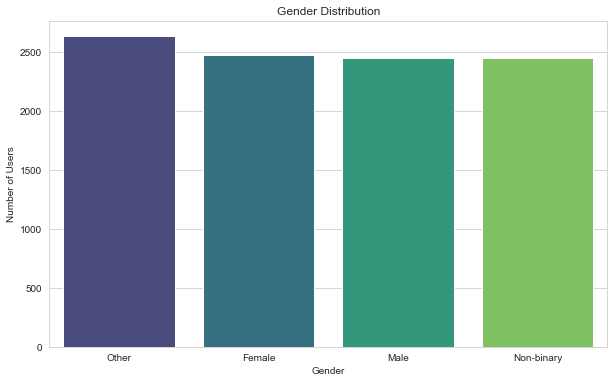

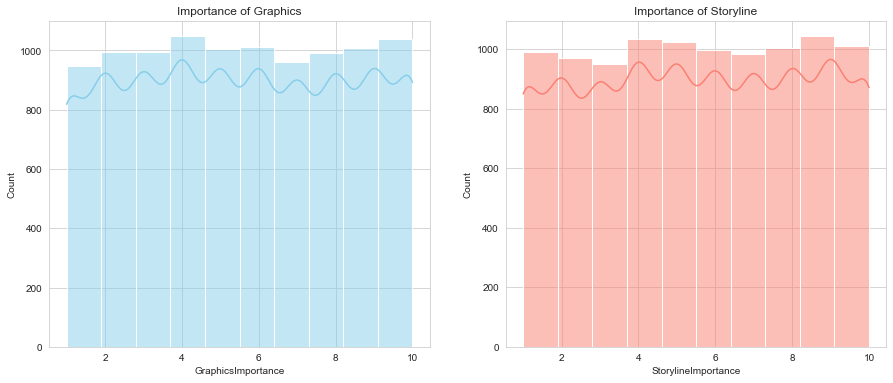

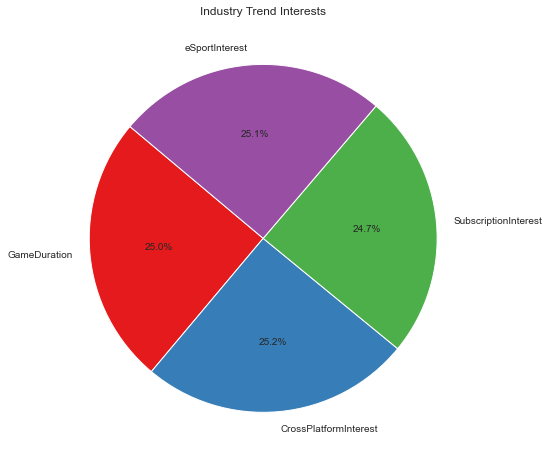

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df["Age"], bins=15, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Users")
plt.show()

# Gender Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x="Gender", data=df, palette="viridis")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Number of Users")
plt.show()
 
# Importance of Graphics and Storyline
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(df["GraphicsImportance"], bins=10, kde=True, ax=ax[0], color="skyblue")
sns.histplot(df["StorylineImportance"], bins=10, kde=True, ax=ax[1], color="salmon")
ax[0].set_title("Importance of Graphics")
ax[1].set_title("Importance of Storyline")
plt.show()

# Recorded Industry trends in our video games
industry_trends = ["GameDuration", "CrossPlatformInterest", "SubscriptionInterest", "eSportInterest"] 
# Aggregating interest for each trend
trend_sums = df[industry_trends].sum()

# Plotting the aggregated interests in a pie chart
plt.figure(figsize=(10, 8))
trend_sums.plot(kind="pie", autopct="%1.1f%%", startangle=140, colors=sns.color_palette("Set1", len(industry_trends)))
plt.title("Industry Trend Interests")
plt.ylabel("")  # Removing the default "None" ylabel
plt.show()


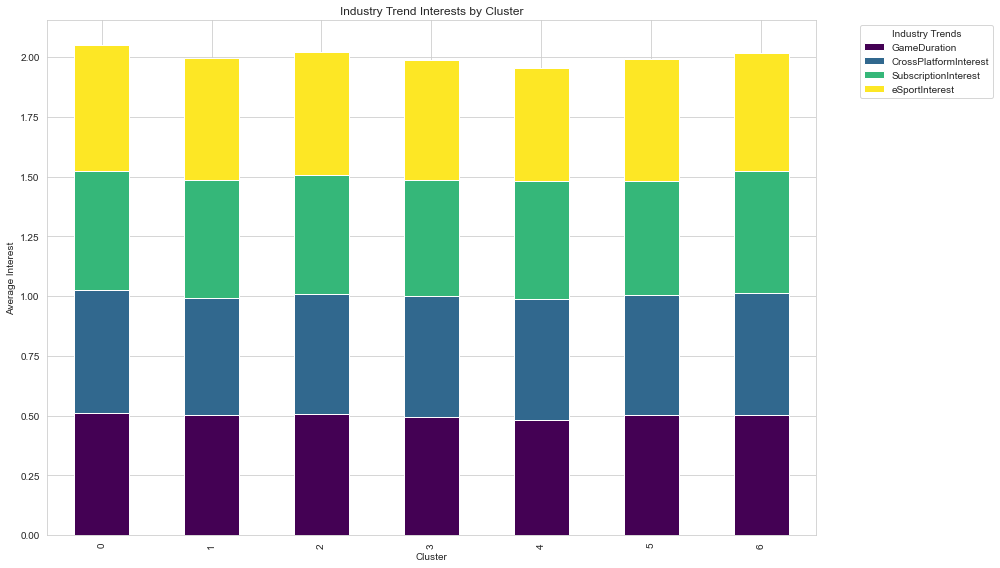

In [10]:
# Grouping by cluster and calculating mean interest for each trend
cluster_trend_interest = df.groupby("Cluster")[industry_trends].mean()

# Visualizing the results using stacked bar plots
cluster_trend_interest.plot(kind="bar", stacked=True, figsize=(14, 8), colormap="viridis")
plt.title("Industry Trend Interests by Cluster")
plt.ylabel("Average Interest")
plt.xlabel("Cluster")
plt.legend(title="Industry Trends", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


## This visualization above shows how each cluster aligns with the different industry trends. A higher bar indicates greater interest in that particular trend within a cluster. Comparing the heights of the bars across clusters will give insights into which segments are more likely to be influenced by upcoming industry changes related to these trends.

#### Create training dataset for further modeling

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Features and Target variable
features = df.drop(columns=industry_trends + ["UserID", "PurchaseDate", "PurchaseMonth", "Cluster"])
target = df["GameDuration"]

# Encoding categorical features
le = LabelEncoder()
features["GameTitle"] = le.fit_transform(features["GameTitle"])
features["Platform"] = le.fit_transform(features["Platform"])
features["Gender"] = le.fit_transform(features["Gender"])
features["Region"] = le.fit_transform(features["Region"])
features["PreferredGenre"] = le.fit_transform(features["PreferredGenre"])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scaling the features in order to have unit variance 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape


((8000, 17), (2000, 17))

## 7) Predictive Modeling for Trend Adoption (one target = industrial trend)  thanks to SK-Learn <3
#### With a logistic regression model

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report 

# Initialize the logistic regression model
logistic_regression_ml_model = LogisticRegression(random_state=42)

# Train the model
logistic_regression_ml_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_regression_ml_model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the logistic regression model : {accuracy:.2f}")
print("This accuracy is normal as data are randomly generated")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy of the logistic regression model : 0.50
This accuracy is normal as data are randomly generated

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.51      0.50       981
           1       0.51      0.49      0.50      1019

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000



#### Wath a Decision Tree Classifier Model

In [13]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the decision tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = decision_tree.predict(X_test)

# Calculate the accuracy
accuracy_tree = accuracy_score(y_test, y_pred_tree)

print(f"Decision Tree Model Accuracy: {accuracy_tree:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tree))


Decision Tree Model Accuracy: 0.49

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.49      0.48       981
           1       0.50      0.49      0.49      1019

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.49      0.49      0.49      2000



#### Gradient Boosting

Gradient Boosting Accuracy: 0.49

Classification Report:              precision    recall  f1-score   support

           0       0.48      0.49      0.48       981
           1       0.49      0.49      0.49      1019

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.49      0.49      0.49      2000



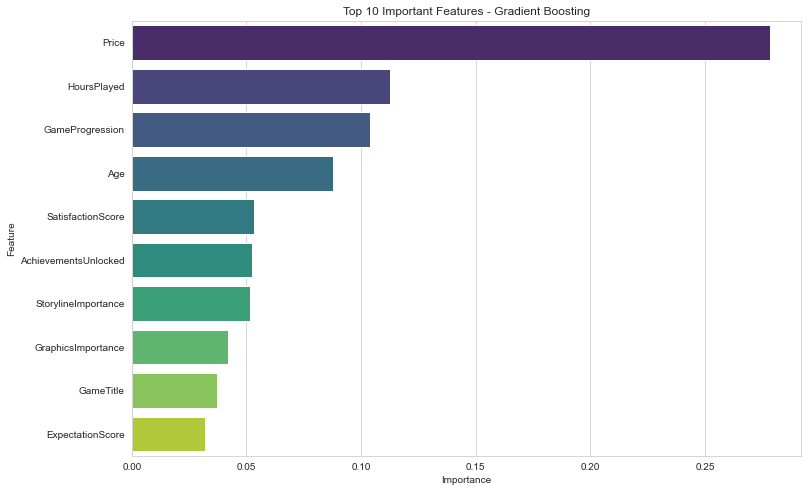

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the gradient boosting classifier
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
gb.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb.predict(X_test)

# Calculate the accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)

print(f"Gradient Boosting Accuracy: {accuracy_gb:.2f}\n\nClassification Report:{classification_report(y_test, y_pred_gb)}") 

# Feature Importance :
# Extract feature importances from the Gradient Boosting model
gb_feature_importances = gb.feature_importances_

# Create a DataFrame for visualization
gb_features_df = pd.DataFrame({
    "Feature": features.columns,
    "Importance": gb_feature_importances
})

# Sort the DataFrame by importance
gb_features_df = gb_features_df.sort_values(by="Importance", ascending=False)

# Plot the top 10 features
plt.figure(figsize=(12, 8))
sns.barplot(data=gb_features_df.head(10), x="Importance", y="Feature", palette="viridis")
plt.title("Top 10 Important Features - Gradient Boosting")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


#### Random Forest

Accuracy of the Random Forest algorithm : 0.49 
 
Classification report :               precision    recall  f1-score   support

           0       0.48      0.50      0.49       981
           1       0.50      0.48      0.49      1019

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.49      0.49      0.49      2000



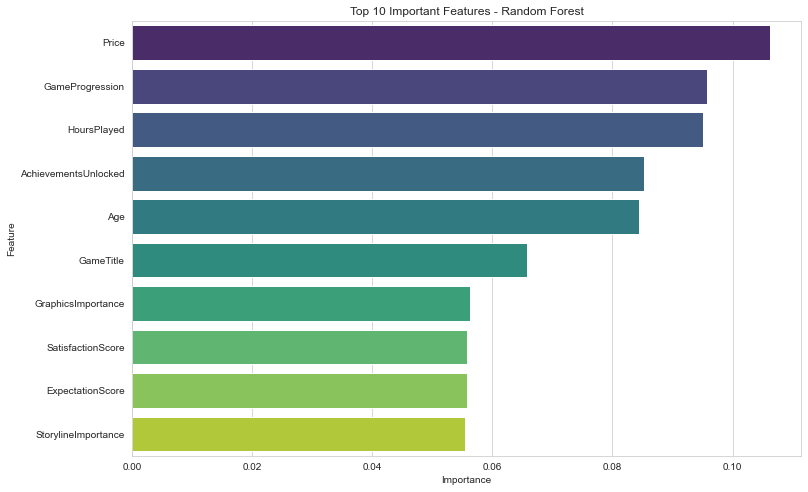

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Calculate the accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Classification Report for Random Forest
report_rf = classification_report(y_test, y_pred_rf)

print(f"Accuracy of the Random Forest algorithm : {accuracy_rf:.2f} \n \nClassification report : {report_rf}")


# Extract feature importances from the Random Forest model
rf_feature_importances = rf.feature_importances_

# Create a DataFrame for visualization
features_df = pd.DataFrame({
    "Feature": features.columns,
    "Importance": rf_feature_importances
})

# Sort the DataFrame by importance
features_df = features_df.sort_values(by="Importance", ascending=False)

# Plot the top 10 features
plt.figure(figsize=(12, 8))
sns.barplot(data=features_df.head(10), x="Importance", y="Feature", palette="viridis")
plt.title("Top 10 Important Features - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()



#### Hyperparameter Tunning on Random Forest

Fitting 5 folds for each of 36 candidates, totalling 180 fits


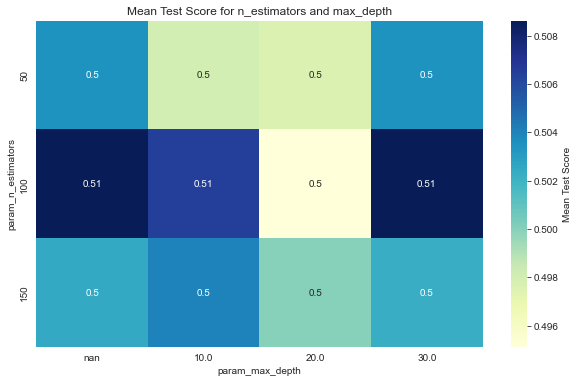

Optimized Random Forest Accuracy: 0.50

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.49      0.49       981
           1       0.51      0.51      0.51      1019

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000



In [16]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for Random Forest
rf_params = {
    "n_estimators": [50, 100, 150],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10]
}

# Initialize GridSearchCV
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, n_jobs=-1, verbose=1)

# Fit to the data
rf_grid_search.fit(X_train, y_train)


# GridSearch
# Convert GridSearchCV results to a DataFrame
results_df = pd.DataFrame(rf_grid_search.cv_results_)

# Filter rows where min_samples_split is equal to its best value
filtered_results = results_df[results_df["param_min_samples_split"] == rf_grid_search.best_params_["min_samples_split"]]

# Pivot the data to get a matrix form suitable for a heatmap
pivot_table = filtered_results.pivot("param_n_estimators", "param_max_depth", "mean_test_score")

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", cbar_kws={"label": "Mean Test Score"})
plt.title("Mean Test Score for n_estimators and max_depth")
plt.show()


# Extract the best model
best_rf = rf_grid_search.best_estimator_

# Predict on the test set
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate the model"s performance
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)

print(f"Optimized Random Forest Accuracy: {accuracy_best_rf:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_rf))


## Churn Prediction (now deleted)

# THANK YOU for viewing my stuff :D 
sough.idwes@gmail.com